In [14]:
### Load PPS model
%run ./PPS_model.ipynb

In [2]:
### Load experimental data (Di Cosmo et al., 2017)

HCdata = pd.read_excel (r'PPS_data_SCZ_SPQ.xlsx',sheet_name='HC') 
SCZdata = pd.read_excel (r'PPS_data_SCZ_SPQ.xlsx',sheet_name='SCZ') 
SPQdata = pd.read_excel (r'PPS_data_SCZ_SPQ.xlsx',sheet_name='high spq') 
LSPQdata = pd.read_excel (r'PPS_data_SCZ_SPQ.xlsx',sheet_name='low spq') 

sets = [HCdata,SCZdata,SPQdata,LSPQdata]
RTdata = []

for i in sets:
    subjects = i['Subject'].unique()
    delays = i[(i['Sound']=='Loom')&(i['Cond'] != 'Loom_NO')]['Cond'].unique()
    delays = np.delete(delays,np.where(delays=='Loom_-700')[0])
    idx = [3,4,0,1,2]
    delays = delays[idx]
    RTs = []
    
    for s in subjects:
        meanRTs = []
        for t in delays:
            RT = i[(i['Subject'] == s)&(i['Cond'] == t)]['Rtpul']           
            meanRTs.append(np.mean(RT))
        RTs.append(meanRTs)
    RTdata.append(RTs)
    
HC_RTs = np.asarray(RTdata[0])
SCZ_RTs = np.asarray(RTdata[1])
SPQ_RTs = np.asarray(RTdata[2])
LSPQ_RTs = np.asarray(RTdata[3])

In [25]:
### Audio-tactile experiment simulation setup 

## Calculate distance in cms. Speaker is positioned at 100cm from the hand. 
times = np.asarray([300,800,1500,2200,2700])
timesweep = np.arange(300,2800,100)
ts = timesweep/1000
v = 30 #cm/s 
a_distances = (120 - ts*v) # distance points in cm (network coordinates)

## Simulation setup
simtime = 200 #ms 

## Synapses setup
Lt,La = Lw(0.15,0.05,1,4,0.15,0.05,20,80)
Wt,Wa,Bt,Ba = Fw(6.5,6.5,2.5,2.5) 

In [26]:
### HC model experiment run

## Run
bi = 0
prlevel = 0
mHC_RTs,ZMs,ZTs,ZAs = experimentrun(a_distances,simtime,bi,prlevel)

## Fit
idx = [0,5,12,19,24]
xf = np.take(mHC_RTs,idx)
yf = np.mean(HC_RTs,axis=0)

etamin,etamax,dc,h = sigfit(mHC_RTs,a_distances)
m = (xf.size * np.sum(xf*yf) - np.sum(xf) * np.sum(yf)) / (xf.size*np.sum(xf*xf) - np.sum(xf) ** 2)
bias = (np.sum(yf) - m*np.sum(xf)) / xf.size

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


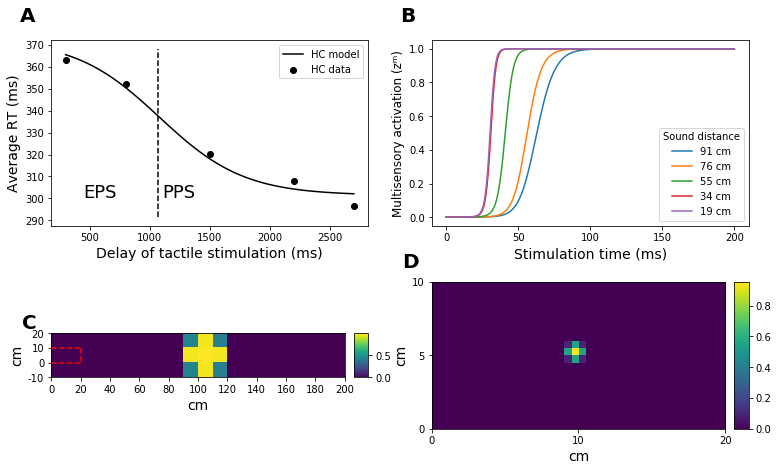

In [27]:
### HC model experiment run - Plotting

exptimes = np.asarray([300,800,1500,2200,2700])
t1 = np.linspace(38, 112, 100)
times1 = np.linspace(300, 2700, 100)
evdis = 2

fig, axs = plt.subplots(2, 2, figsize=(12.5, 7.5));

ax1 = plt.subplot(224)
im1 = ax1.imshow(ZTs[:,:,evdis].transpose())
ax1.set_ylabel('cm',size=14)
ax1.set_xlabel('cm',size=14)
ax1.set_xticks(np.arange(-.5, 41, 20))
ax1.set_yticks(np.arange(-.5, 21, 10))
ax1.set_xticklabels(np.arange(0, 30, 10))
ax1.set_yticklabels(np.arange(0, 15, 5)[::-1])
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = fig.colorbar(im1,cax=cax)
ax1.text(-0.1, 1.1, string.ascii_uppercase[3], transform=ax1.transAxes, 
            size=20, weight='bold')

ax2 = plt.subplot(223)
im2 = ax2.imshow(ZAs[:,:,evdis].transpose())
ax2.set_ylabel('cm',size=14)
ax2.set_xlabel('cm',size=14)
ax2.set_xticks(np.arange(-.5, 21, 2))
ax2.set_yticks(np.arange(-.5, 3, 1))
ax2.set_xticklabels(np.arange(0, 210, 20))
ax2.set_yticklabels(np.arange(-10, 21, 10)[::-1])
ax2.plot(np.repeat(1.5,25),np.linspace(0.5,1.5,25),'--',color='red')
ax2.plot(np.linspace(-0.5,1.5,25),np.repeat(0.5,25),'--',color='red')
ax2.plot(np.linspace(-0.5,1.5,25),np.repeat(1.5,25),'--',color='red')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = fig.colorbar(im2,cax=cax)
ax2.text(-0.1, 1.1, string.ascii_uppercase[2], transform=ax2.transAxes, 
            size=20, weight='bold')

ax3 = plt.subplot(222)
x = np.asarray([0,50,100,150,200])
expdistances = np.take(a_distances,idx)
for i in range(len(expdistances)):
    ax3.plot(ZMs[:,idx[i]],label=str(int(expdistances[i]-20))+" cm")
ax3.set_xlabel('Stimulation time (ms)',size=14)
ax3.set_ylabel('Multisensory activation (z\u1d50)',size=12) # change for superscript m
ax3.set_xticks(x/0.4);
ax3.set_xticklabels(x);
plt.legend(loc="lower right",fontsize = 'medium', title = 'Sound distance') #bbox_to_anchor=(1,0.5)
ax3.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax3.transAxes, 
            size=20, weight='bold')

ax4 = plt.subplot(221)
ax4.set_xlabel('Delay of tactile stimulation (ms)',size=14)
ax4.set_ylabel('Average RT (ms)',size=14)
exptimes = np.asarray([300,800,1500,2200,2700])
times1 = np.linspace(300, 2700, 100)
ax4.scatter(exptimes,yf, color = 'black', label = 'HC data')
ax4.plot(np.flip(times1), m*RTsig(t1,etamin,etamax,dc,h)+bias, color = 'black', label='HC model')
ppscp = ((120-np.mean(dc))/v)*1000
ax4.plot(np.repeat(ppscp,25),np.linspace(np.min(yf)-5,np.max(yf)+5,25),'--',color='black')
ax4.legend(fontsize = 'medium')
ax4.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax4.transAxes, 
            size=20, weight='bold')
ax4.text(0.35,0.15,"PPS",fontsize=18,transform=ax4.transAxes)
ax4.text(0.1,0.15,"EPS",fontsize=18,transform=ax4.transAxes)

fig.savefig('Results/FIG2.eps', bbox_inches='tight',format='eps')

In [28]:
### SCZ model experiment run

## Run
bi = 4.49317781
prlevel = 1.94636878
mSCZ_RTs,mSCZ_ZMs,mSCZ_ZTs,mSCZ_ZAs = experimentrun(a_distances,simtime,bi,prlevel)

## Fit
idx = [0,5,12,19,24]
xf = np.take(mSCZ_RTs,idx)
yf = np.mean(SCZ_RTs,axis=0)

sczetamin,sczetamax,sczdc,sczh = sigfit(mSCZ_RTs,a_distances)
sczm = (xf.size * np.sum(xf*yf) - np.sum(xf) * np.sum(yf)) / (xf.size*np.sum(xf*xf) - np.sum(xf) ** 2)
sczbias = (np.sum(yf) - sczm*np.sum(xf)) / xf.size

In [29]:
### H-SPQ model experiment run

## Run  
bi = 4.30153794
prlevel = 0.14795582
mSPQ_RTs,mSPQ_ZMs,mSPQ_ZTs,mSPQ_ZAs = experimentrun(a_distances,simtime,bi,prlevel)

## Fit
idx = [0,5,12,19,24]
xf = np.take(mSPQ_RTs,idx)
yf = np.mean(SPQ_RTs,axis=0)

spqetamin,spqetamax,spqdc,spqh = sigfit(mSPQ_RTs,a_distances)
spqm = (xf.size * np.sum(xf*yf) - np.sum(xf) * np.sum(yf)) / (xf.size*np.sum(xf*xf) - np.sum(xf) ** 2)
spqbias = (np.sum(yf) - spqm*np.sum(xf)) / xf.size

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


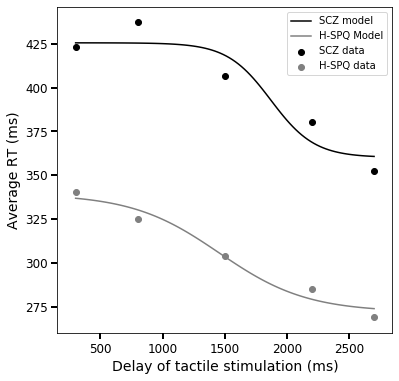

In [30]:
### SCZ and H-SPQ models experiment runs - Plotting

fig, ax1 = plt.subplots(1,1,sharex=True,figsize=(6,6))

ax1.scatter(times,np.mean(SCZ_RTs,axis=0),color='black',label='SCZ data') #15
ax1.plot(np.flip(times1),sczm*RTsig(t1,sczetamin,sczetamax,sczdc,sczh)+sczbias,color='black',label='SCZ model')
ax1.scatter(times,np.mean(SPQ_RTs,axis=0),color='grey',label='H-SPQ data') 
ax1.plot(np.flip(times1),spqm*RTsig(t1,spqetamin,spqetamax,spqdc,spqh)+spqbias,color='grey',label='H-SPQ Model')
ax1.set_ylabel('Average RT (ms)',size=14)
ax1.set_xlabel('Delay of tactile stimulation (ms)',size=14)
ax1.tick_params(length=6, width=2,labelsize = 'large')
ax1.legend(fontsize = 'medium')
plt.subplots_adjust(hspace=.0)

fig.savefig('Results/FIG3.eps', bbox_inches='tight',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


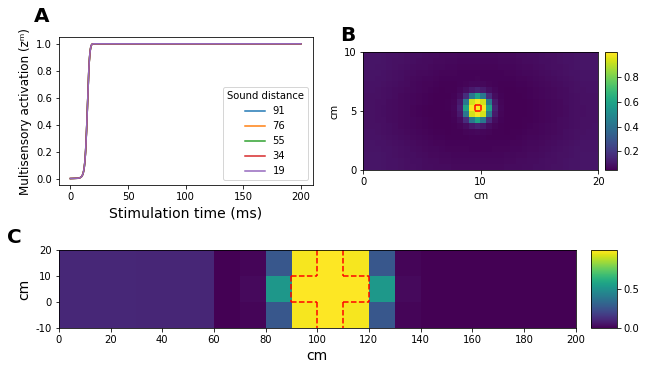

In [31]:
### SCZ model dynamics

sczfig, axs = plt.subplots(2, 2, figsize=(10, 6));

ax1 = plt.subplot(222)
im1 = ax1.imshow(mSCZ_ZTs[:,:,evdis].transpose())
ax1.set_ylabel('cm',size=10)
ax1.set_xlabel('cm',size=10)
ax1.set_xticks(np.arange(-.5, 41, 20))
ax1.set_yticks(np.arange(-.5, 21, 10))
ax1.set_xticklabels(np.arange(0, 30, 10))
ax1.set_yticklabels(np.arange(0, 15, 5)[::-1])
# HC activation as dashed lines
ax1.plot(np.repeat(19.5,25),np.linspace(8.5,9.5,25),'--',color='red')
ax1.plot(np.repeat(18.5,25),np.linspace(8.5,9.5,25),'--',color='red')
ax1.plot(np.linspace(18.5,19.5,25),np.repeat(8.5,25),'--',color='red')
ax1.plot(np.linspace(18.5,19.5,25),np.repeat(9.5,25),'--',color='red')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
sczfig.colorbar(im1,cax=cax)
ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
            size=20, weight='bold')

ax2 = plt.subplot(212)
im2 = ax2.imshow(mSCZ_ZAs[:,:,evdis].transpose())
ax2.set_ylabel('cm',size=14)
ax2.set_xlabel('cm',size=14)
ax2.set_xticks(np.arange(-.5, 21, 2))
ax2.set_yticks(np.arange(-.5, 3, 1))
ax2.set_xticklabels(np.arange(0, 210, 20))
ax2.set_yticklabels(np.arange(-10, 21, 10)[::-1])
# HC activation as dashed lines
ax2.plot(np.repeat(8.5,25),np.linspace(0.5,1.5,25),'--',color='red')
ax2.plot(np.repeat(9.5,25),np.linspace(1.5,2.5,25),'--',color='red')
ax2.plot(np.repeat(9.5,25),np.linspace(-0.5,0.5,25),'--',color='red')
ax2.plot(np.repeat(10.5,25),np.linspace(1.5,2.5,25),'--',color='red')
ax2.plot(np.repeat(10.5,25),np.linspace(-0.5,0.5,25),'--',color='red')
ax2.plot(np.repeat(11.5,25),np.linspace(0.5,1.5,25),'--',color='red')
ax2.plot(np.linspace(8.5,9.5,25),np.repeat(0.5,25),'--',color='red')
ax2.plot(np.linspace(8.5,9.5,25),np.repeat(1.5,25),'--',color='red')
ax2.plot(np.linspace(10.5,11.5,25),np.repeat(0.5,25),'--',color='red')
ax2.plot(np.linspace(10.5,11.5,25),np.repeat(1.5,25),'--',color='red')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
sczfig.colorbar(im2,cax=cax)
ax2.text(-0.1, 1.1, string.ascii_uppercase[2], transform=ax2.transAxes, 
            size=20, weight='bold')

ax3 = plt.subplot(221)
x = np.asarray([0,50,100,150,200])
expdistances = np.take(a_distances,idx)
for i in range(len(expdistances)):
    ax3.plot(mSCZ_ZMs[:,i],label=str(int(expdistances[i]-20)))
ax3.set_xlabel('Stimulation time (ms)',size=14)
ax3.set_ylabel('Multisensory activation (z\u1d50)',size=12) # change for superscript m
ax3.set_xticks(x/0.4);
ax3.set_xticklabels(x);
plt.legend(loc="lower right",title='Sound distance')
ax1.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax3.transAxes, 
            size=20, weight='bold')

sczfig.savefig('Results/FIG4.eps', bbox_inches='tight', format = 'eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


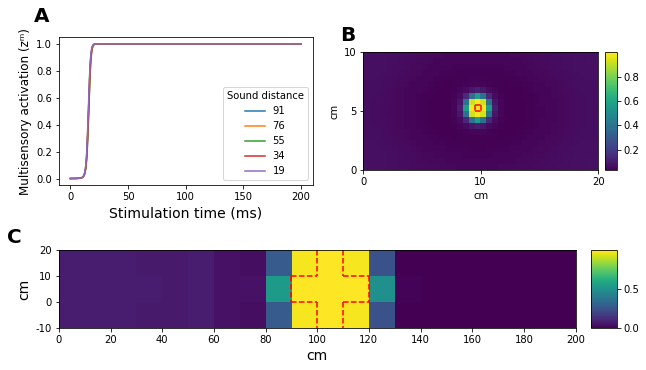

In [33]:
### SPQ model dynamics

spqfig, axs = plt.subplots(2, 2, figsize=(10, 6));

ax1 = plt.subplot(222)
im1 = ax1.imshow(mSPQ_ZTs[:,:,evdis].transpose())
ax1.set_ylabel('cm',size=10)
ax1.set_xlabel('cm',size=10)
ax1.set_xticks(np.arange(-.5, 41, 20))
ax1.set_yticks(np.arange(-.5, 21, 10))
ax1.set_xticklabels(np.arange(0, 30, 10))
ax1.set_yticklabels(np.arange(0, 15, 5)[::-1])
# HC activation as dashed lines
ax1.plot(np.repeat(19.5,25),np.linspace(8.5,9.5,25),'--',color='red')
ax1.plot(np.repeat(18.5,25),np.linspace(8.5,9.5,25),'--',color='red')
ax1.plot(np.linspace(18.5,19.5,25),np.repeat(8.5,25),'--',color='red')
ax1.plot(np.linspace(18.5,19.5,25),np.repeat(9.5,25),'--',color='red')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
spqfig.colorbar(im1,cax=cax)
ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
            size=20, weight='bold')

ax2 = plt.subplot(212)
im2 = ax2.imshow(mSPQ_ZAs[:,:,evdis].transpose())
ax2.set_ylabel('cm',size=14)
ax2.set_xlabel('cm',size=14)
ax2.set_xticks(np.arange(-.5, 21, 2))
ax2.set_yticks(np.arange(-.5, 3, 1))
ax2.set_xticklabels(np.arange(0, 210, 20))
ax2.set_yticklabels(np.arange(-10, 21, 10)[::-1])
# HC activation as dashed lines
ax2.plot(np.repeat(8.5,25),np.linspace(0.5,1.5,25),'--',color='red')
ax2.plot(np.repeat(9.5,25),np.linspace(1.5,2.5,25),'--',color='red')
ax2.plot(np.repeat(9.5,25),np.linspace(-0.5,0.5,25),'--',color='red')
ax2.plot(np.repeat(10.5,25),np.linspace(1.5,2.5,25),'--',color='red')
ax2.plot(np.repeat(10.5,25),np.linspace(-0.5,0.5,25),'--',color='red')
ax2.plot(np.repeat(11.5,25),np.linspace(0.5,1.5,25),'--',color='red')
ax2.plot(np.linspace(8.5,9.5,25),np.repeat(0.5,25),'--',color='red')
ax2.plot(np.linspace(8.5,9.5,25),np.repeat(1.5,25),'--',color='red')
ax2.plot(np.linspace(10.5,11.5,25),np.repeat(0.5,25),'--',color='red')
ax2.plot(np.linspace(10.5,11.5,25),np.repeat(1.5,25),'--',color='red')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
spqfig.colorbar(im2,cax=cax)
ax2.text(-0.1, 1.1, string.ascii_uppercase[2], transform=ax2.transAxes, 
            size=20, weight='bold')

ax3 = plt.subplot(221)
x = np.asarray([0,50,100,150,200])
expdistances = np.take(a_distances,idx)
for i in range(len(expdistances)):
    ax3.plot(mSPQ_ZMs[:,i],label=str(int(expdistances[i]-20)))
ax3.set_xlabel('Stimulation time (ms)',size=14)
ax3.set_ylabel('Multisensory activation (z\u1d50)',size=12) # change for superscript m
ax3.set_xticks(x/0.4);
ax3.set_xticklabels(x);
plt.legend(loc="lower right",title='Sound distance')
ax3.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax3.transAxes, 
            size=20, weight='bold')

spqfig.savefig('Results/spqmodel.eps', bbox_inches='tight', format = 'eps')

In [34]:
### Auditory unimodal experiment 

## Simulation setup
ua_distances = np.arange(20,170,10)
simtime = 200 #ms

In [35]:
### SCZ model unimodal experiment run
b = 4.49317781
prlim = 1.94636878
mSCZ_aRTs,mSCZ_aZMs,mSCZ_aZTs,mSCZ_aZAs = aunisensoryexperiment(ua_distances,simtime,b,prlim)

In [36]:
### H-SPQ model unimodal experiment run
b = 4.30153794
prlim = 0.14795582
mSPQ_aRTs,mSPQ_aZMs,mSPQ_aZTs,mSPQ_aZAs = aunisensoryexperiment(ua_distances,simtime,b,prlim)

Text(-0.1, 1.1, 'C')

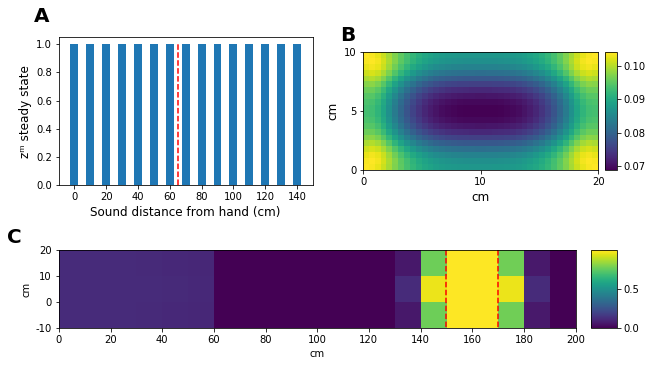

In [37]:
### SCZ model unimodal dynamics

last = int(simtime/0.4)
evdis = 14
idx = [0,5,12,19,24]

sczfig, axs = plt.subplots(2, 2, figsize=(10, 6));

ax1 = plt.subplot(221)
ax1.bar(ua_distances-20,mSCZ_aZMs[last,:],width=5)
ax1.set_xlabel('Sound distance from hand (cm)',size=12)
ax1.set_ylabel('z\u1d50 steady state',size=12)
ax1.plot(np.repeat(65,25),np.linspace(0,1,25),'--',color='red')
ax1.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax1.transAxes,size=20, weight='bold')

ax2 = plt.subplot(222)
im = ax2.imshow(mSCZ_aZTs[:,:,evdis].transpose())
ax2.set_ylabel('cm',size=12)
ax2.set_xlabel('cm',size=12)
ax2.set_xticks(np.arange(-.5, 41, 20))
ax2.set_yticks(np.arange(-.5, 21, 10))
ax2.set_xticklabels(np.arange(0, 30, 10))
ax2.set_yticklabels(np.arange(0, 15, 5)[::-1])
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
sczfig.colorbar(im, cax=cax)
ax2.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax2.transAxes,size=20, weight='bold')

ax4 = plt.subplot(212)
im2 = ax4.imshow(mSCZ_aZAs[:,:,evdis].transpose())
ax4.set_ylabel('cm')
ax4.set_xlabel('cm')
ax4.set_xticks(np.arange(-.5, 21, 2))
ax4.set_yticks(np.arange(-.5, 3, 1))
ax4.set_xticklabels(np.arange(0, 210, 20))
ax4.set_yticklabels(np.arange(-10, 21, 10)[::-1])
# HC activation as dashed lines
ax4.plot(np.repeat(14.5,25),np.linspace(-0.5,2.5,25),'--',color='red')
ax4.plot(np.repeat(16.5,25),np.linspace(-0.5,2.5,25),'--',color='red')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
sczfig.colorbar(im2,cax=cax)
ax4.text(-0.1, 1.1, string.ascii_uppercase[2], transform=ax4.transAxes, 
            size=20, weight='bold')

#sczfig.savefig('Results/FIG5.eps', bbox_inches='tight', format = 'eps')

Text(-0.1, 1.1, 'C')

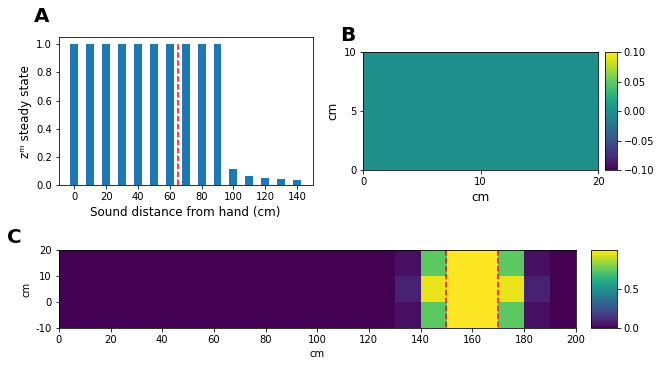

In [38]:
### H-SPQ unimodal dynamics

spqfig, axs = plt.subplots(2, 2, figsize=(10, 6));

ax1 = plt.subplot(221)
ax1.bar(ua_distances-20,mSPQ_aZMs[last,:],width=5)
ax1.plot(np.repeat(65,25),np.linspace(0,1,25),'--',color='red')
ax1.set_xlabel('Sound distance from hand (cm)',size=12)
ax1.set_ylabel('z\u1d50 steady state',size=12)
ax1.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax1.transAxes, 
            size=20, weight='bold')

ax2 = plt.subplot(222)
im = ax2.imshow(mSPQ_aZTs[:,:,evdis].transpose())
ax2.set_ylabel('cm',size=12)
ax2.set_xlabel('cm',size=12)
ax2.set_xticks(np.arange(-.5, 41, 20))
ax2.set_yticks(np.arange(-.5, 21, 10))
ax2.set_xticklabels(np.arange(0, 30, 10))
ax2.set_yticklabels(np.arange(0, 15, 5)[::-1])
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)
ax2.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax2.transAxes, 
            size=20, weight='bold')

ax4 = plt.subplot(212)
im2 = ax4.imshow(mSPQ_aZAs[:,:,evdis].transpose())
ax4.set_ylabel('cm')
ax4.set_xlabel('cm')
ax4.set_xticks(np.arange(-.5, 21, 2))
ax4.set_yticks(np.arange(-.5, 3, 1))
ax4.set_xticklabels(np.arange(0, 210, 20))
ax4.set_yticklabels(np.arange(-10, 21, 10)[::-1])
# HC activation as dashed lines
ax4.plot(np.repeat(14.5,25),np.linspace(-0.5,2.5,25),'--',color='red')
ax4.plot(np.repeat(16.5,25),np.linspace(-0.5,2.5,25),'--',color='red')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
sczfig.colorbar(im2,cax=cax)
ax4.text(-0.1, 1.1, string.ascii_uppercase[2], transform=ax4.transAxes, 
            size=20, weight='bold')

#spqfig.savefig('Results/FIG6.eps', bbox_inches='tight', format = 'eps')